In [21]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src')

import os
import time
from IPython.core.display import clear_output
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import lmfit

from meta import MetaAnalyzer
from meta import SlotModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading Image from /mnt/e/Data/JensenLab/FIBImage/Set1_FIB_ellipse/roa0_0_1.tif


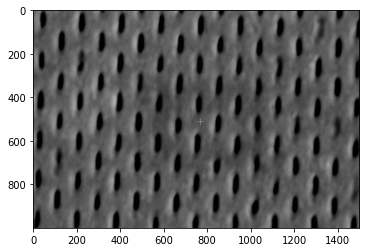

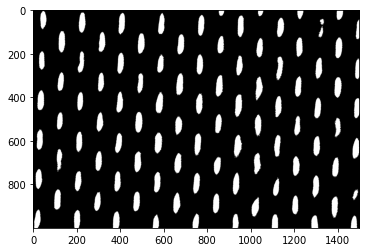

In [29]:
analysis_list = []
canvas_y, canvas_x = (0, 1000), (0, 1500)
min_slot_size = 50
threshold = 40
scale = 500/277
run_fit = True
show_iter_output = True
max_fit_iter = None
init_params = {
    'y0': {
        'value': 0,
        'vary': True,
    },
    'x0': {
        'value': 0,
        'vary': True,
    },
    'py': {
        'value': 180,
        'vary': True,
        'min': 0,
    },
    'px': {
        'value': 183,
        'vary': True,
        'min': 0,
    },
    'dy': {
        'value': 177//4,
        'vary': True,
        'min': 0,
    },
    'dx': {
        'value': 177//4,
        'vary': True,
        'min': 0,
    },
    'l': {
        'value': 200/2,
        'vary': True,
        'min': 0,
        'max': 177,
    },
    'w': {
        'value': 30,
        'vary': True,
        'min': 0,
        'max': 177/4,
    },
    'r': {
        'value': 2,
        'vary': True,
        'min': 0,
    },
    't1': {
        'value': 0,
        'vary': True,
        'min': -pi/2,
        'max': pi/2,
    },
    't2': {
        'value': 0,
        'vary': True,
        'min': -pi/2,
        'max': pi/2,
    },
    'phi': {
        'value': -pi/180*2.5,
        'vary': True,
        'min': -pi/2,
        'max': pi/2,
    }
}
dirpath = os.path.abspath("/mnt/e/Data/JensenLab/FIBImage/Set1_FIB_ellipse")
images = []
for file in os.listdir(dirpath):
    if file.endswith('.tif'):
        images.append(file)
for i, image in enumerate(images):
    print(f"{i} {image}")
# selected_index = 0
selected_index = int(input("Enter the index of the file to be processed"))
clear_output()
for i, name in enumerate(images):
    if i != selected_index: continue
    path = os.path.join(dirpath, name)
    name = name.replace("roa", "").replace(".tif", "")
    args = name.split("_")

    analysis = MetaAnalyzer(path=path, canvas=(canvas_y, canvas_x), min_slot_size=min_slot_size, threshold=threshold, init_params=init_params, scale=scale, verbose=show_iter_output, max_fit_iter=max_fit_iter)
    # if run_fit:
    #     result = analysis.fit_lattice_lmfit()
    #     analysis_list.append(analysis)
    #     print(result.fit_report())
    #     analysis.print_physical_params(result.params)
    # analysis.plot_matplotlib()
    plt.imshow(analysis.image, cmap='gray')
    plt.show()
    plt.imshow(analysis.contours_image, cmap='gray')
    plt.show()
    # analysis.plot_plotly()